# Proyecto Integrado

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

**Descripción de los datos**

* Name (Nombre)

* Platform (Plataforma)

* Year_of_Release (Año de lanzamiento)

* Genre (Género) 

* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

* EU_sales (ventas en Europa en millones de dólares estadounidenses) 

* JP_sales (ventas en Japón en millones de dólares estadounidenses) 

* Other_sales (ventas en otros países en millones de dólares estadounidenses) 

* Critic_Score (máximo de 100) 

* User_Score (máximo de 10) 

* Rating (ESRB)

**Introducción**

El mercado de los videojuegos ha experimentado un crecimiento exponencial en las últimas décadas, transformándose en una industria multimillonaria con una base de usuarios diversa y global. Con el aumento en la variedad y el volumen de juegos disponibles, las empresas del sector enfrentan el desafío de determinar cuáles juegos tendrán éxito, una tarea que implica no solo intuición creativa sino también análisis detallado de datos. Este proyecto tiene como objetivo aplicar técnicas de análisis de datos para identificar patrones o tendencias que puedan predecir el éxito de los videojuegos, proporcionando así una base sólida para decisiones estratégicas en marketing y desarrollo de productos.

**Objetivo**

El objetivo principal de este proyecto es analizar un conjunto de datos de videojuegos para identificar factores clave que determinan el éxito comercial de un juego. Esto incluye:

* Examinar cómo las calificaciones de usuarios y críticos, las plataformas de lanzamiento, los géneros de juegos y las clasificaciones ESRB influyen en las ventas de videojuegos.
<br>

* Descubrir tendencias regionales que puedan informar estrategias de marketing localizadas.
<br>

* Evaluar la relevancia de diferentes plataformas y géneros a lo largo del tiempo para detectar posibles áreas de crecimiento o declive.

**Etapas de Análisis**

**1. Preparación de Datos**

* Revisión y limpieza de los datos.
* Conversión de tipos de datos y manejo de valores ausentes.

**2. Análisis Exploratorio de Datos**

* Evaluación de la distribución de juegos por año, plataforma y género.
* Análisis de las ventas globales y regionales para identificar plataformas y géneros líderes.

**3. Análisis Estadístico**

* Pruebas de hipótesis para comparar las calificaciones medias entre diferentes plataformas y géneros.
* Correlación entre las reseñas y las ventas para entender el impacto de las percepciones de los usuarios y críticos en el éxito comercial.

**4. Visualización de Datos**

* Creación de gráficos y tablas para ilustrar los hallazgos y apoyar la interpretación de los resultados.
* Diagramas de caja y gráficos de dispersión para mostrar distribuciones y relaciones entre variables.

**5. Conclusiones y Recomendaciones**

* Resumen de los hallazgos clave y su implicación para estrategias de marketing y desarrollo de productos.
* Sugerencias basadas en datos para la selección futura de proyectos y campañas publicitarias.

Gracias por su observación, desarrollé una introducción, plantee objetivos y sus respectivas etapas de análisis.

## Cargar la base de datos y estudiar su información general

In [1]:
# Importar librerias y paqueterias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Extraer los Datos a un DataFrame
df = pd.read_csv('/datasets/games.csv')

# Mostrar los primeros registros
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Mostrar total de filas y columnas
df.shape

(16715, 11)

In [4]:
# Mostrar la información de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Revisar datos estadísticos de columnas numericas
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Preparacion de los datos

### __Reemplazar nombres de columnas (ponlos en minúsculas)__

In [6]:
# Renombrar columnas
df.columns = [column.lower() for column in df.columns]

# Checkear el cambio de nombre
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### __Conversión de data__

In [7]:
# Resumen de valores nulos en 'year_of_release'
year_null_count = df['year_of_release'].isnull().sum()

# Contar cuántas veces aparece 'tbd' en 'user_score'
tbd_count = (df['user_score'] == 'tbd').sum()

year_null_count, tbd_count

(269, 2424)

**year_of_release:** Los valores nulos podrían dejarse como están si el análisis posterior no depende críticamente de esta columna. Otra opción es imputarlos, pero dado que representan menos del 2% del total y son datos temporales, la imputación podría no ser precisa sin un patrón claro.
<br>

**user_score:** Podemos tratar los valores 'tbd' como valores nulos, ya que 'tbd' indica que la puntuación está por determinarse y no proporciona información numérica útil.

In [8]:
# Convertir 'tbd' en 'user_score' a NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

# Convertir 'year_of_release' a int, ignorando los NaN por ahora
df['year_of_release'] = df['year_of_release'].dropna().astype(int)

# Verificar los cambios en los tipos de datos
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

* La columna **user_score** originalmente incluía valores numéricos expresados como cadenas de texto, así como la abreviatura 'tbd' (to be determined), lo cual impedía operaciones numéricas. Convertimos esta columna a tipo **float** después de reemplazar **'tbd'** con **NaN** (Not a Number). Esto es esencial para realizar análisis estadísticos y operaciones matemáticas, como calcular promedios o correlaciones con otras variables numéricas.
<br>

* La columna **year_of_release** representa años que son valores discretos y deberían ser representados como enteros. La conversión directa a **int** es problemática debido a la presencia de valores **NaN**, ya que **int** no puede representar **NaN** en pandas. Aunque intentamos convertirlo a int, lo hemos dejado como float para mantener la integridad de los datos sin perder información debido a los valores nulos. Para ciertas operaciones donde se requieren valores enteros exactos (como índices o etiquetas), podríamos considerar alternativas como convertir a Int64 o manejar los NaN de forma específica antes de la conversión.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### __Tratamiento de valores ausentes__

In [10]:
# Eliminando filas donde 'genre' es nulo
df.dropna(subset=['genre'], inplace=True)

# Eliminando filas donde 'year_of_release' es nulo o igual a 0
df.dropna(subset=['year_of_release'], inplace=True)  # Elimina primero los nulos
df = df[df['year_of_release'] != 0]

# Convertir 'year_of_release' a int
df['year_of_release'] = df['year_of_release'].astype(int)

# Imputando la media en 'user_score' donde los valores son nulos
df['user_score'].fillna(df['user_score'].mean(), inplace=True)

In [11]:
# Calculamos la mediana de 'critic_score' agrupada por 'genre' y 'platform'
mean_scores = df.groupby(['genre', 'platform'])['critic_score'].median()

# Función para aplicar la imputación donde los valores son nulos
def impute_critic_score(row):
    # Si 'critic_score' es NaN, intenta imputar
    if pd.isna(row['critic_score']):
        return mean_scores.get((row['genre'], row['platform']), np.nan)
    # Si 'critic_score' no es NaN, deja el valor como está
    return row['critic_score']

# Aplicar la función a cada fila del dataframe
df['critic_score'] = df.apply(impute_critic_score, axis=1)

# Verificar si aún hay valores nulos en 'critic_score' y cuántos
remaining_nans = df['critic_score'].isna().sum()
remaining_nans

1111

Gracias por su observación, he aplicado los cambios.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     15333 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

**1. Eliminación de filas en genre y year_of_release**

* **genre**: Se eliminaron filas donde **genre** es **nulo**. La razón se basa en la importancia del género para cualquier análisis relacionado con videojuegos, ya que el género es un factor clave que afecta tanto a las preferencias de los usuarios como a las tendencias de ventas. Sin esta información, las filas son menos útiles para análisis segmentados por tipo de juego.
<br>

* **year_of_release:** Se eliminaron filas donde **year_of_release** es **nulo** o igual a **0**. La ausencia de un año de lanzamiento válido hace que sea imposible realizar análisis temporales o tendencias a lo largo del tiempo, que son esenciales para planificar campañas publicitarias y entender ciclos de vida del producto. Convertir esta columna a **int** después de la eliminación asegura que todos los valores sean numéricos y válidos, facilitando cualquier comparación o agrupación temporal.

**2. Imputación de user_score**

**user_score:** Considerando que la media y la mediana presentan valores similares para **user_score**. Se imputó la media para sus valores nulos. Esta decisión permite mantener la integridad estructural del dataset, evitando la pérdida de datos en otras columnas valiosas.

**3. Imputación de critic_score**

**critic_score:** La imputación de los valores nulos se realizó utilizando la media de puntuaciones de críticos agrupadas por **genre** y **platform**. Este método es preferible sobre una simple imputación media porque toma en cuenta la naturaleza del juego y su plataforma, ofreciendo una estimación más contextualizada y precisa de la puntuación que podría haber recibido un juego similar. Es una técnica de imputación que intenta preservar las relaciones subyacentes en los datos, asumiendo que juegos de géneros y plataformas similares tendrán puntuaciones de crítica parecidas.

#### ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Considerando la estructura y las columnas del dataset, aquí están algunas explicaciones posibles para los distintos campos:

**1. year_of_release**

* __Falta de registros:__ Algunos juegos podrían no tener información de lanzamiento bien documentada, especialmente si son más antiguos o fueron lanzados por marcas más pequeñas.
<br>

* __Errores en la entrada de datos:__ Los errores humanos durante la recopilación o entrada de datos pueden llevar a omisiones.

**2. name y genre**

* __Errores de catalogación:__ Es posible que algunos juegos no estén correctamente catalogados bajo un género específico, o que los nombres no se hayan capturado debido a errores en las fuentes de datos.
<br>

* __Lanzamientos limitados:__ Juegos con lanzamientos muy limitados o regionales pueden no tener un género fácilmente clasificable o incluso su nombre puede haber sido omitido en las bases de datos consolidadas.

**3. critic_score y user_score**

* __Falta de revisiones:__ No todos los juegos reciben atención crítica, especialmente juegos menos populares o de nicho. Esto puede resultar en una falta de critic_score.
<br>

* __Baja participación de usuarios:__ Juegos menos conocidos o antiguos podrían no tener suficientes calificaciones de usuarios para justificar un user_score.
<br>

* __Plataformas de revisión inconsistentes:__ Algunas plataformas o tipos de juego pueden no ser evaluados consistentemente por los críticos o en sitios de calificación de usuarios.

**4. rating**

* __Proceso de calificación no aplicado o incompleto:__ Algunos juegos, especialmente aquellos fuera del mercado principal o lanzamientos independientes, podrían no pasar por un proceso de calificación formal con organizaciones como ESRB, PEGI, etc.
<br>

* __Cambios en las políticas de calificación:__ Las políticas y la cobertura de las juntas de calificación pueden cambiar con el tiempo, afectando la disponibilidad de calificaciones para juegos en ciertos periodos o regiones.

#### Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

Covertiremos **"TBD"** a **NaN**, se mantiene la integridad del análisis y permite uso de técnicas de imputación estándar o especializadas que pueden adaptarse mejor a los objetivos del estudio. Posteriormente, se imputaran valores **NaN** por su media. 

### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [13]:
# Calcular ventas totales, creando nueva columna
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Mostrar las ventas totales
df['total_sales'].sum()

8814.369999999999

In [14]:
# Suma de ventas por juego
sales_per_game = df.groupby('name')['total_sales'].sum()
print(sales_per_game)

name
 Beyblade Burst                 0.03
 Fire Emblem Fates              1.67
 Frozen: Olaf's Quest           1.10
 Haikyu!! Cross Team Match!     0.04
 Tales of Xillia 2              0.84
                                ... 
thinkSMART FAMILY!              0.03
thinkSMART: Chess for Kids      0.01
uDraw Studio                    2.42
uDraw Studio: Instant Artist    0.19
¡Shin Chan Flipa en colores!    0.14
Name: total_sales, Length: 11426, dtype: float64


## Analizar los datos

### Mira cuántos juegos fueron lanzados en diferentes años. __¿Son significativos los datos de cada período?__

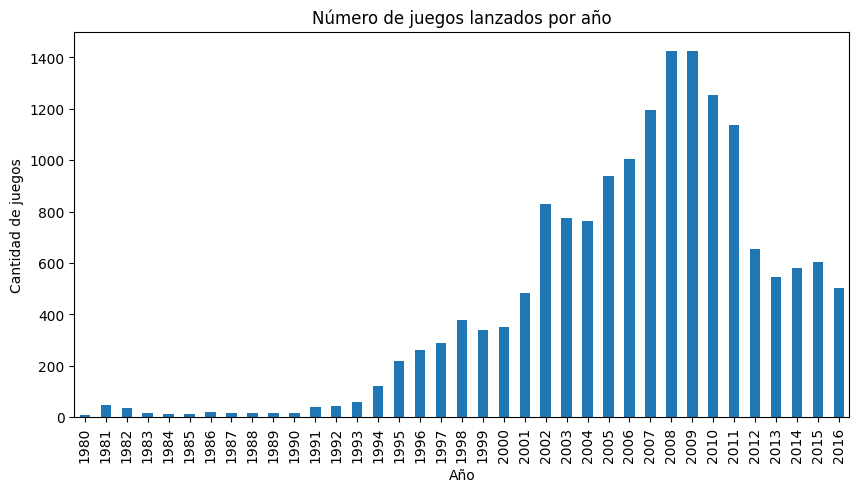

In [15]:
# Distribución de juegos por año
plt.figure(figsize=(10, 5))
df['year_of_release'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.show()

**Significancia de los Datos:**

* __1980-1995:__ Muestra un crecimiento gradual y representa la era inicial de los videojuegos, lo que puede ser útil para estudios históricos o análisis de cómo las plataformas y géneros empezaron a popularizarse.
<br>

* __1996-2008:__ Período de auge en el lanzamiento de juegos, reflejando probablemente la era dorada de la innovación en videojuegos con la introducción de muchas plataformas nuevas y el establecimiento de franquicias icónicas.
<br>

* __Post-2008:__ Disminución en los lanzamientos podría estar relacionada con la maduración de la industria y un enfoque en plataformas digitales y juegos móviles, que no siempre se capturan completamente en los recuentos tradicionales de lanzamientos.

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. __¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?__

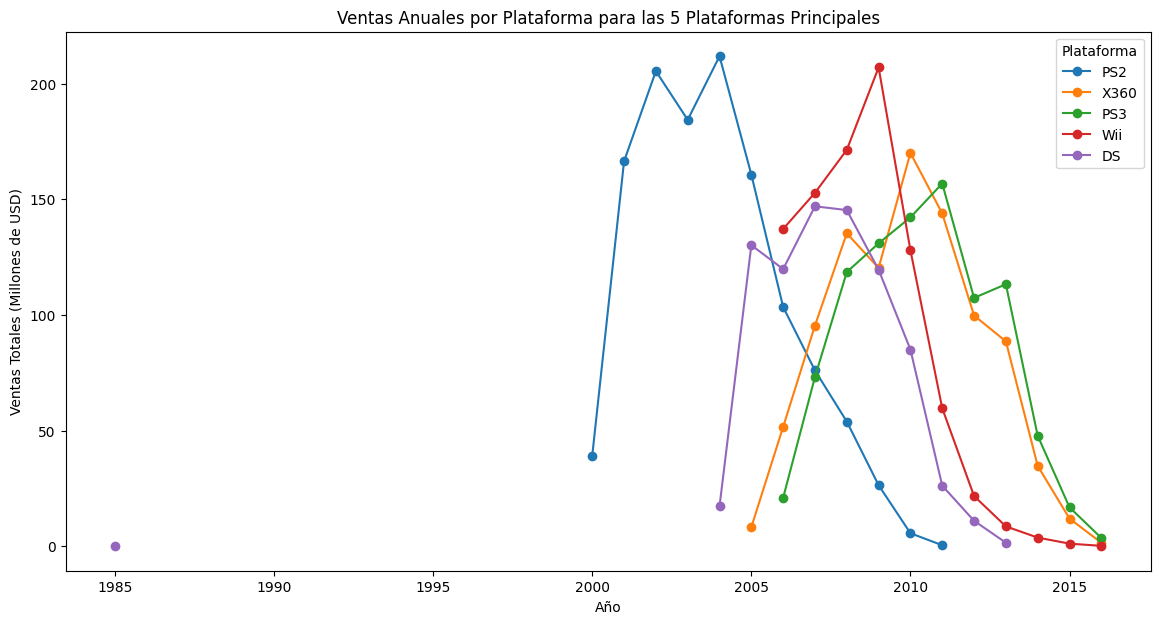

In [16]:
# Calcular ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Agrupar datos por plataforma y año, sumando las ventas totales
platform_yearly_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

# Visualizar las ventas anuales para las principales plataformas
platform_yearly_sales.loc[platform_sales.index[:5]].transpose().plot(figsize=(14, 7), marker='o')
plt.title('Ventas Anuales por Plataforma para las 5 Plataformas Principales')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (Millones de USD)')
plt.legend(title='Plataforma')
plt.show()

In [17]:
# Agrupar los datos por plataforma y año, sumando las ventas totales
platform_year_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

# Obtener el último año de ventas registradas para cada plataforma
last_year_sales = platform_year_sales.apply(lambda x: x.last_valid_index(), axis=1)
platforms_no_sales = last_year_sales[last_year_sales < df['year_of_release'].max()]

print("Plataformas que eran populares pero ahora no tienen ventas:")
print(platforms_no_sales)

Plataformas que eran populares pero ahora no tienen ventas:
platform
2600    1989
3DO     1995
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PCFX    1996
PS      2003
PS2     2011
PSP     2015
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
XB      2008
dtype: int64


In [18]:
# Identificar el primer año en que cada plataforma apareció en el mercado
platform_introductions = df.groupby('platform')['year_of_release'].min().sort_values()

# Calcular la diferencia de tiempo entre introducciones consecutivas de plataformas
time_between_introductions = platform_introductions.diff().dropna()

# Calcular el tiempo promedio entre la aparición de nuevas plataformas
average_time_between_introductions = time_between_introductions.mean()
print(f"Tiempo promedio entre la aparición de nuevas plataformas: {average_time_between_introductions:.2f} años")

Tiempo promedio entre la aparición de nuevas plataformas: 1.10 años


In [19]:
# Último año de lanzamientos registrados para cada plataforma
last_year_of_sales = df.groupby('platform')['year_of_release'].max()

# Duración desde el primer año hasta el último año de actividad
platform_active_years = last_year_of_sales - platform_introductions

# Calcular el tiempo promedio que las plataformas están activas antes de desaparecer
average_platform_lifespan = platform_active_years.mean()
print(f"Tiempo promedio de actividad antes de que las plataformas desaparezcan: {average_platform_lifespan:.2f} años")

Tiempo promedio de actividad antes de que las plataformas desaparezcan: 7.61 años


### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

**Factores Clave a Considerar**

* **Ciclos de Vida de las Plataformas:** El tiempo promedio que las plataformas están activas antes de desaparecer es de aproximadamente **7.61 años**. Esto sugiere que debemos centrarnos en plataformas que aún estaban activas o en las últimas etapas de su vida útil alrededor de 2010-2016.
<br>

* **Aparición de Nuevas Plataformas:** Con un tiempo promedio de aproximadamente **1.10 años** entre la aparición de nuevas plataformas, es probable que varias plataformas nuevas hayan sido introducidas y establecidas hacia 2016, afectando el mercado en 2017.
<br>

* **Plataformas sin Ventas Actuales:** Las plataformas listadas que no tienen ventas recientes deben ser consideradas al evaluar la relevancia de los datos antiguos, particularmente aquellas que cesaron actividad antes de 2010.

**Periodo de Datos Recomendado**

* **2010-2016:** Este periodo captura los últimos datos disponibles antes de 2017 y **refleja las tendencias recientes en tecnología y preferencias de los consumidores**.

Este rango asegura que el modelo esté informado por los datos más relevantes a las condiciones contemporáneas, incluyendo el efecto de nuevas plataformas y el declive de las antiguas.

### Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [20]:
# Filtrar el DataFrame para el período de 2010 a 2016
df_filtered = df[(df['year_of_release'] >= 2010) & (df['year_of_release'] <= 2016)]

# Verificar la distribución del número de juegos y ventas en este rango
print(df_filtered['year_of_release'].value_counts().sort_index())
print()
print(df_filtered.groupby('year_of_release')['total_sales'].sum())

2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

year_of_release
2010    590.13
2011    507.58
2012    355.84
2013    361.24
2014    331.53
2015    267.98
2016    129.94
Name: total_sales, dtype: float64


### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [21]:
# Calcula las ventas totales por plataforma
total_sales_by_platform = df_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(total_sales_by_platform)

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: total_sales, dtype: float64


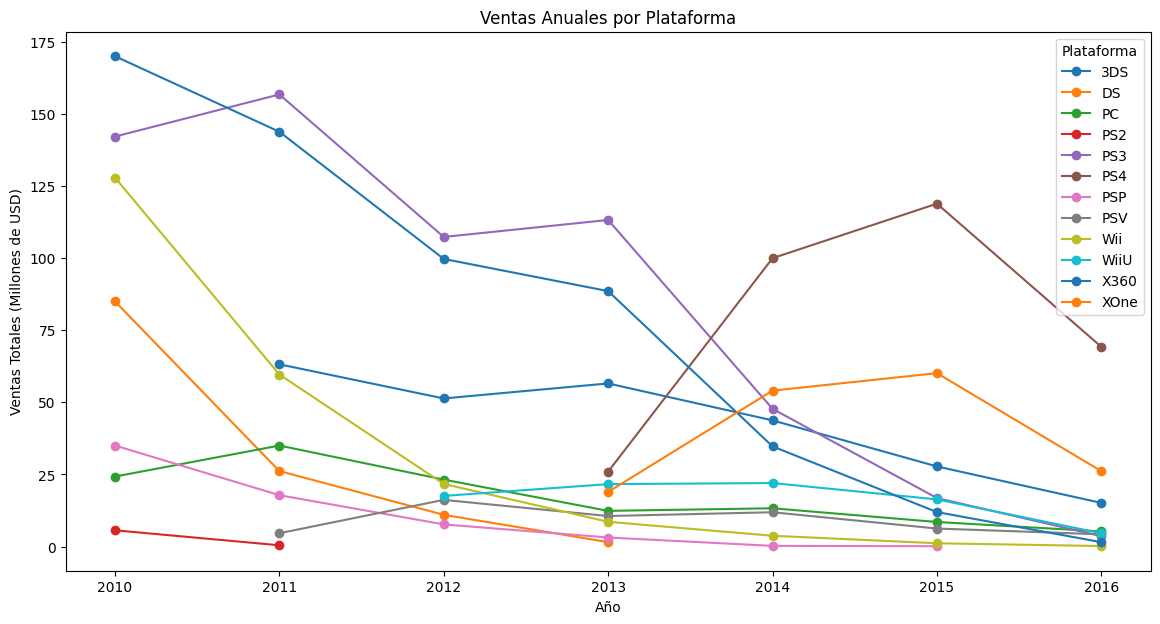

In [22]:
# Agrupar los datos por plataforma y año, sumando las ventas totales
sales_by_year_platform = df_filtered.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

# Visualizar las ventas anuales para cada plataforma
sales_by_year_platform.transpose().plot(kind='line', figsize=(14, 7), marker='o', title='Ventas Anuales por Plataforma')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (Millones de USD)')
plt.legend(title='Plataforma')
plt.show()

* __Líderes en Ventas__
<br>

__PS3:__ Con un total de **587.74 millones de USD**, aunque en declive, fue una de las plataformas más fuertes en ventas totales.
<br>

__Xbox 360 (X360):__ Con ventas totales de **550.41 millones de USD**, también en declive, pero históricamente muy fuerte.
<br>

__PS4:__ Aunque más reciente, ha acumulado rápidamente ventas totales de **314.14 millones de USD**.
<br>

* __Plataformas en Crecimiento__
<br>

__PS4:__ Mostró un crecimiento rápido desde su lanzamiento y, a pesar de una leve caída en 2016, se perfila como una **plataforma líder**.
<br>

__Xbox One (XOne):__ Similar a PS4, con un crecimiento consistente desde su lanzamiento y buenas perspectivas a pesar de una caída en 2016.
<br>

* __Plataformas en Declive__
<br>

__Wii:__ Las ventas han disminuido considerablemente, sugiriendo que está bien pasada su etapa de pico.
<br>

__DS:__ Con prácticamente ninguna venta en 2016, indica que ya no es una plataforma viable.
<br>

__PSP y PS2:__ Ambas han visto declives significativos y bajos niveles de ventas en los últimos años observados.
<br>

* __Plataformas Potencialmente Rentables__
<br>

__PS4 y Xbox One:__ Ambas no solo están creciendo, sino que su posición en el mercado sugiere que continuarán siendo importantes plataformas de juego.
<br>

__3DS:__ A pesar de un declive, ha mantenido un nivel decente de ventas y podría ser considerada para nichos de mercado específicos, especialmente juegos portátiles o dirigidos a audiencias más jóvenes.

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

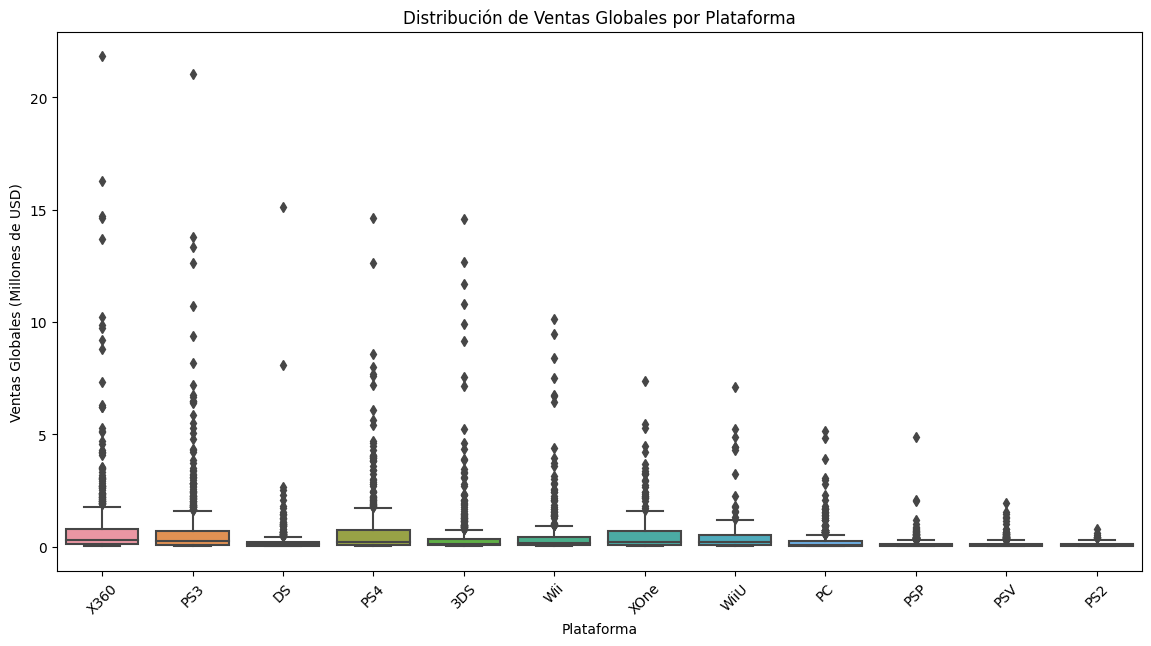

In [23]:
# Crear un diagrama de caja para comparar las ventas globales de juegos por plataforma
plt.figure(figsize=(14, 7))
sns.boxplot(x='platform', y='total_sales', data=df_filtered)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (Millones de USD)')
plt.xticks(rotation=45)  # Rota las etiquetas para mejor visualización
plt.show()

In [24]:
# Crear una tabla pivote para calcular la media de ventas por plataforma
pivot_table = df_filtered.pivot_table(index='platform', values='total_sales', aggfunc='mean')

# Ordenar los resultados por la media de ventas de mayor a menor para mejor visualización
sorted_pivot_table = pivot_table.sort_values(by='total_sales', ascending=False)

# Imprimir la tabla pivote ordenada
sorted_pivot_table.T

platform,X360,PS4,PS3,XOne,WiiU,3DS,Wii,PC,DS,PS2,PSP,PSV
total_sales,0.809426,0.801378,0.661125,0.64502,0.559116,0.503535,0.495489,0.254614,0.244083,0.135333,0.1281,0.125431


**Conclusiones**

**Ventas:** Sí, hay diferencias significativas en las ventas entre las plataformas. Las plataformas más nuevas y/o más populares como **PS4 y X360** tienden a tener un rendimiento superior.Otras plataformas, como **PSP y PSV**, tienen ventas medianas mucho más bajas y menos outliers, indicando un rendimiento generalmente más bajo y menos variabilidad en las ventas.

**Ventas Promedio:** Las ventas promedio varían ampliamente; plataformas más orientadas a los consumidores masivos y con fuerte apoyo de títulos de alto presupuesto (como **PS4 y X360**) muestran un promedio y un alcance de ventas más alto. Plataformas más antiguas o menos populares como **PS2 y PSP** muestran ventas promedio mucho menores.

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

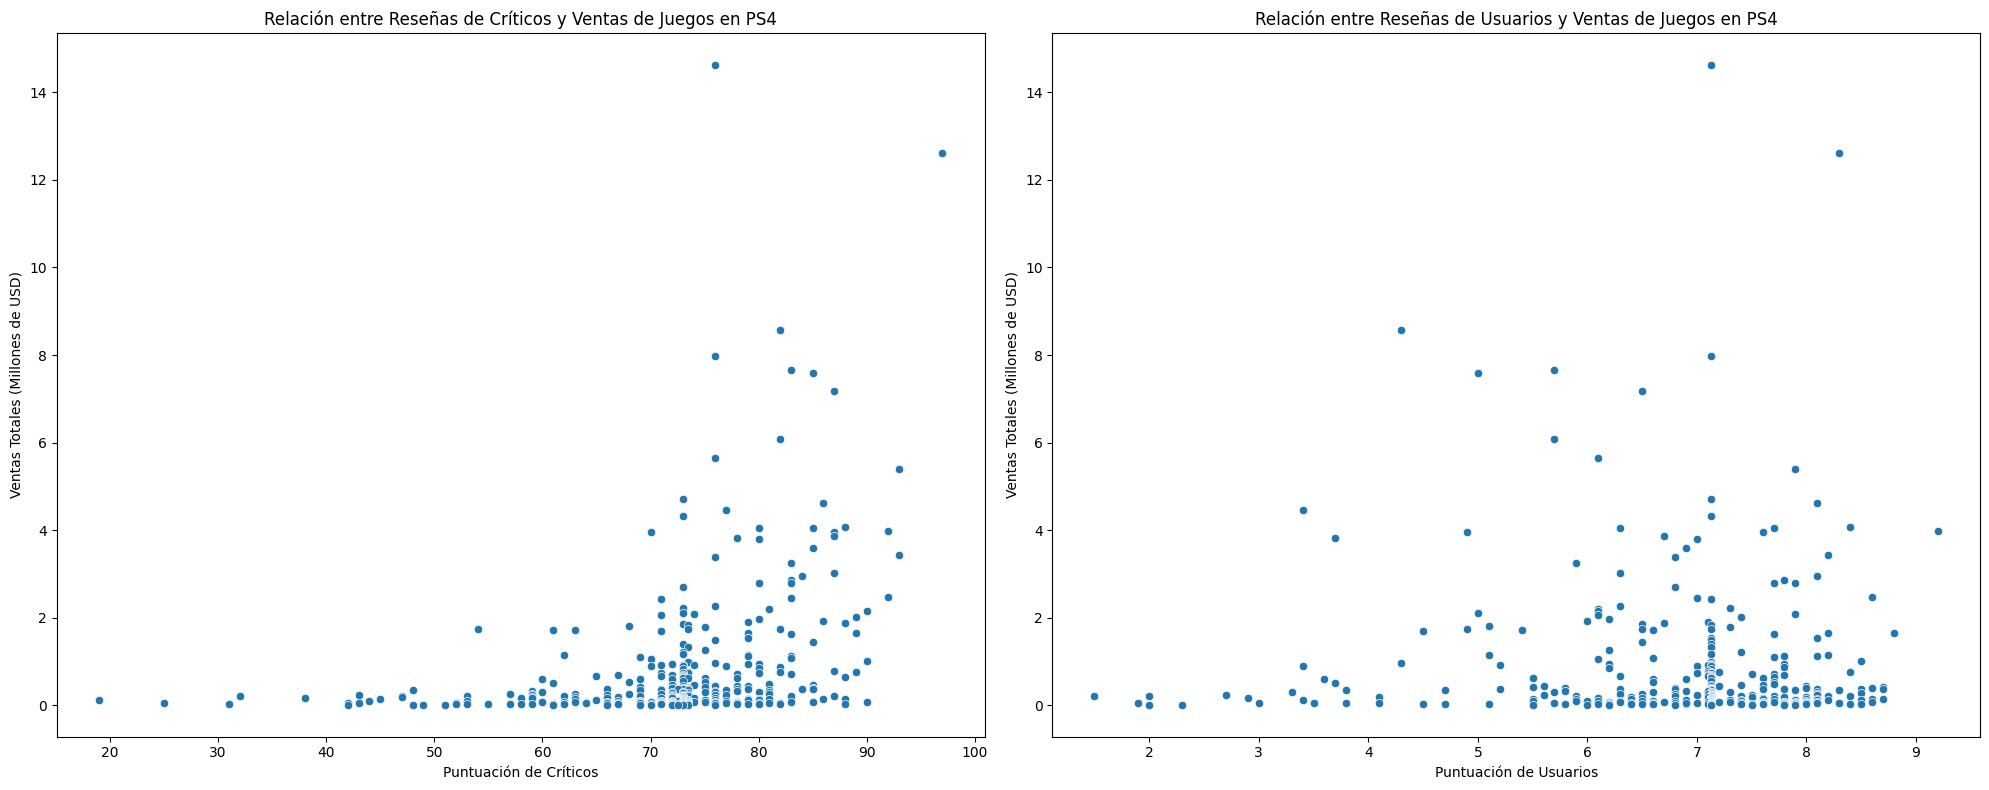

In [25]:
# Filtrar datos para PS4
ps4_data = df[df['platform'] == 'PS4']

# Configurar un subplot horizontal
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))  # Ajusta 'figsize' según tus necesidades

# Gráfico de dispersión para reseñas de críticos vs. ventas en el primer panel
sns.scatterplot(ax=axes[0], x='critic_score', y='total_sales', data=ps4_data)
axes[0].set_title('Relación entre Reseñas de Críticos y Ventas de Juegos en PS4')
axes[0].set_xlabel('Puntuación de Críticos')
axes[0].set_ylabel('Ventas Totales (Millones de USD)')

# Gráfico de dispersión para reseñas de usuarios vs. ventas en el segundo panel
sns.scatterplot(ax=axes[1], x='user_score', y='total_sales', data=ps4_data)
axes[1].set_title('Relación entre Reseñas de Usuarios y Ventas de Juegos en PS4')
axes[1].set_xlabel('Puntuación de Usuarios')
axes[1].set_ylabel('Ventas Totales (Millones de USD)')

# Mostrar el subplot completo
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para dar espacio a las etiquetas
plt.show()

In [26]:
# Calcular la correlación entre puntuaciones de críticos y ventas
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print(f"Correlación entre puntuaciones de críticos y ventas: {critic_corr:.2f}")

# Calcular la correlación entre puntuaciones de usuarios y ventas
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(f"Correlación entre puntuaciones de usuarios y ventas: {user_corr:.2f}")

Correlación entre puntuaciones de críticos y ventas: 0.33
Correlación entre puntuaciones de usuarios y ventas: -0.05


**Conclusiones**

* Las reseñas de críticos parecen ser un indicador más fiable de éxito en ventas que las reseñas de usuarios para los juegos en PS4. Los desarrolladores y editores podrían considerar enfocarse en obtener críticas positivas de críticos profesionales para mejorar las ventas.
<br>

* Las puntuaciones de usuarios no muestran un impacto claro en las ventas, sugiriendo que las estrategias de marketing y las características del juego podrían tener más influencia en las ventas que la retroalimentación de los usuarios post-lanzamiento.
<br>

* Para estrategias de marketing y desarrollo de producto, enfocarse en asegurar altas puntuaciones de críticos y mejorar aspectos del juego que son frecuentemente criticados puede ser más beneficioso para aumentar las ventas que intentar moderar o mejorar las puntuaciones de usuarios.

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [27]:
# Suponemos que 'df' es tu DataFrame que contiene los datos de los juegos
df_filtered_2 = df_filtered.dropna(subset=['name', 'platform', 'total_sales'])  # Asegurarse de que no hay valores nulos en columnas críticas

# Filtrar juegos que aparecen en más de una plataforma
same_games_df = df_filtered_2[df_filtered_2['name'].duplicated(keep=False)]

In [28]:
# Agrupar por nombre de juego y plataforma, y calcular ventas totales
platform_sales = same_games_df.groupby(['name', 'platform'])['total_sales'].sum().unstack()

# Para mostrar las ventas de los juegos comunes en diferentes plataformas seleccionadas correctamente
selected_platforms = platform_sales[['PC', 'PS4', 'X360', 'XOne']]

# Imprimir las primeras filas para las plataformas seleccionadas
print(selected_platforms)

platform                               PC  PS4  X360  XOne
name                                                      
 Frozen: Olaf's Quest                 NaN  NaN   NaN   NaN
2010 FIFA World Cup South Africa      NaN  NaN  0.85   NaN
2014 FIFA World Cup Brazil            NaN  NaN  0.43   NaN
3rd Super Robot Wars Z Jigoku Hen     NaN  NaN   NaN   NaN
3rd Super Robot Wars Z: Tengoku-Hen   NaN  NaN   NaN   NaN
...                                   ...  ...   ...   ...
de Blob 2                             NaN  NaN  0.15   NaN
iCarly 2: iJoin The Click!            NaN  NaN   NaN   NaN
nail'd                                NaN  NaN  0.11   NaN
pro evolution soccer 2011            0.06  NaN  0.60   NaN
uDraw Studio: Instant Artist          NaN  NaN  0.02   NaN

[1015 rows x 4 columns]


In [29]:
# Ordenar el DataFrame 'selected_platforms' por la columna de PS4 de mayor a menor
sorted_selected_platforms = selected_platforms.sort_values(by='PS4', ascending=False)

# Mostrar el DataFrame ordenado
print(sorted_selected_platforms[:10])

platform                          PC    PS4   X360  XOne
name                                                    
Call of Duty: Black Ops 3       0.26  14.63   1.70  7.39
Grand Theft Auto V              1.17  12.62  16.27  5.47
FIFA 16                         0.20   8.58   1.57  3.25
Star Wars Battlefront (2015)    0.55   7.98    NaN  3.66
Call of Duty: Advanced Warfare  0.41   7.66   4.28  5.26
FIFA 17                         0.12   7.60   0.38  2.65
Fallout 4                       1.28   7.17    NaN  4.22
FIFA 15                         0.29   6.08   2.92  2.18
Destiny                          NaN   5.64   1.92  3.37
The Last of Us                   NaN   4.72    NaN   NaN


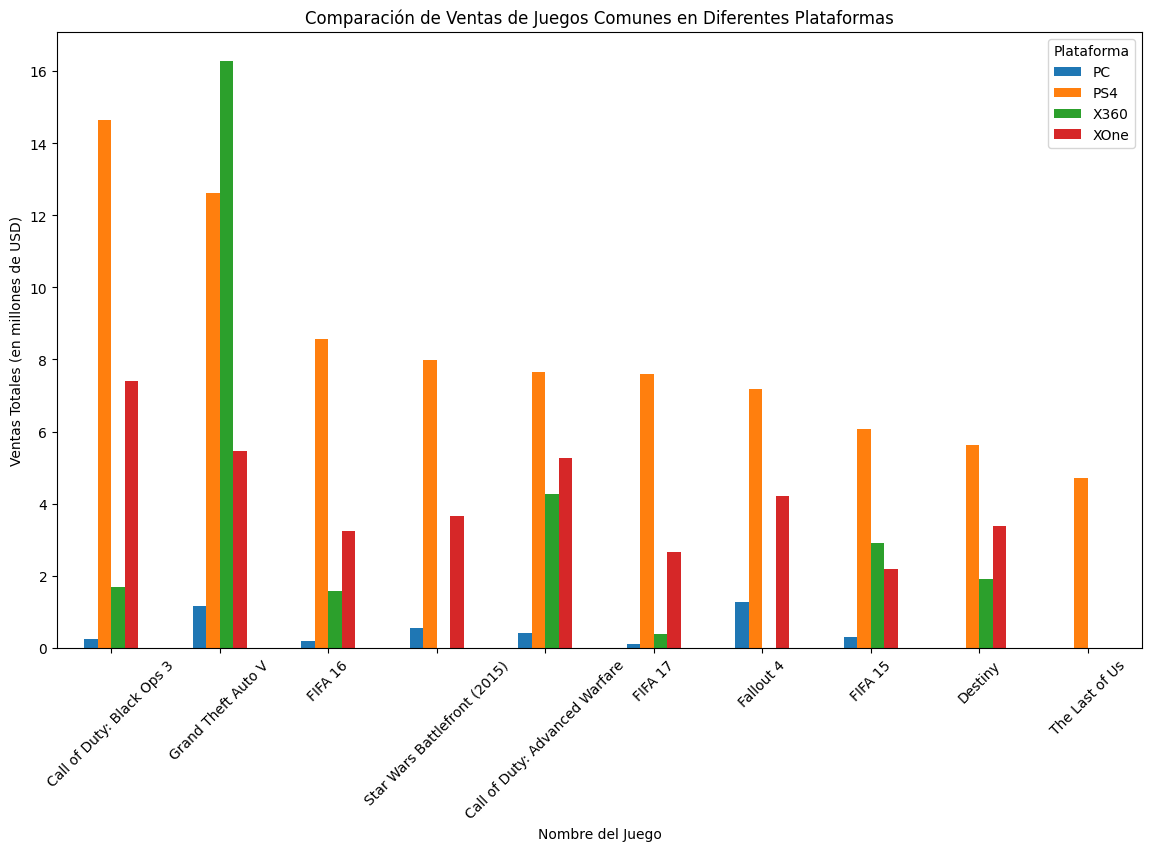

In [30]:
# Crear un gráfico de barras para comparar las ventas de los mismos juegos en diferentes plataformas
sorted_selected_platforms[:10].plot(kind='bar', figsize=(14, 8), title='Comparación de Ventas de Juegos Comunes en Diferentes Plataformas')
plt.xlabel('Nombre del Juego')
plt.ylabel('Ventas Totales (en millones de USD)')
plt.legend(title='Plataforma')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor legibilidad
plt.show()

**Ventas por Plataforma:**

* **PlayStation 4 (PS4) y Xbox One (XOne)** generalmente presentan ventas más altas en comparación con Xbox 360 (X360) y PC para la mayoría de los juegos mostrados. Esto podría reflejar la mayor base de usuarios activos y la más reciente generación de consolas durante el período de lanzamiento de estos juegos.
<br>

* **PC** muestra ventas significativamente más bajas en la mayoría de los juegos, lo cual podría indicar preferencias de plataforma o diferencias en la experiencia de juego compartido que favorecen las consolas sobre PC.

**Juegos Específicos:**

* **"Grand Theft Auto V"** muestra ventas impresionantes en **PS4 y X360**, destacando como un juego extremadamente popular en múltiples plataformas.
<br>

* Juegos como **"FIFA 17"** y **"FIFA 16"** también muestran buenas ventas en **PS4 y X360**, lo que refleja la popularidad global del fútbol y la fuerte presencia de estas franquicias en consolas.
<br>

* **"Fallout 4"** tiene una notable presencia en PC, lo cual es típico para juegos RPG que a menudo tienen una base de seguidores fuerte y modding en PC.

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [31]:
# Agrupar los datos por género y sumar las ventas totales
genre_sales = df_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Mostrar los resultados
print("Ventas Totales por Género:")
print(genre_sales)

Ventas Totales por Género:
genre
Action          673.09
Shooter         479.74
Sports          328.39
Role-Playing    315.28
Misc            234.56
Racing          122.68
Platform        119.72
Fighting         81.59
Simulation       71.75
Adventure        61.00
Strategy         35.84
Puzzle           20.60
Name: total_sales, dtype: float64


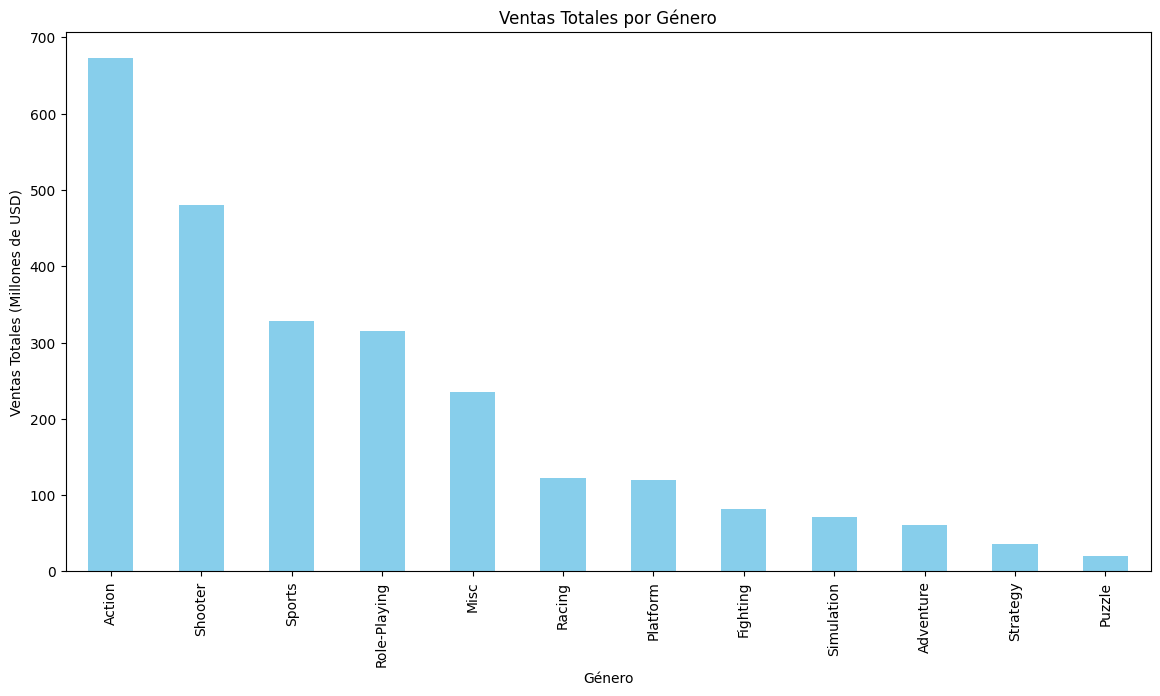

In [32]:
# Crear un gráfico de barras para visualizar las ventas totales por género
genre_sales.plot(kind='bar', figsize=(14, 7), color='skyblue', title='Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (Millones de USD)')
plt.show()

**Géneros más Rentables** 

* __Acción:__ Género con ventas más altas, destacándose considerablemente sobre los demás. Convoca una amplia audiencia debido a su dinamismo y variedad de subgéneros.
<br>

* __Shooter:__ Sigue siendo extremadamente popular, ofreciendo experiencias tanto competitivas como cooperativas que son muy atractivas para el segmento de jugadores en línea.
<br>

* __Deportes:__ Los juegos de deportes, con eventos anuales y una fuerte lealtad de marca, también muestran ventas robustas.
<br>
Comparten características de alta interacción, competencia y frecuentemente reciben fuertes campañas de marketing y desarrollo continuo de grandes estudios, lo que contribuye a sus altas ventas.

**Generalizaciones Sobre Ventas Altas y Bajas**

* __Ventas Altas:__ Tienden a ser aquellos que ofrecen experiencias intensas y emocionantes con un fuerte enfoque en gráficos y jugabilidad cinematográfica envolvente. Estos juegos a menudo también soportan modos multijugador, lo que puede extender su vida útil y por ende, aumentar las ventas.
<br>

* __Ventas Bajas:__ A menudo requieren gustos específicos o son más casuales y menos propensos a generar grandes campañas de marketing o grandes lanzamientos.

## Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [33]:
# Suponiendo que df es tu DataFrame y tiene columnas para ventas en NA, UE, y JP
top_platforms_na = df_filtered.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df_filtered.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df_filtered.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 plataformas en NA:\n", top_platforms_na)
print()
print("Top 5 plataformas en UE:\n", top_platforms_eu)
print()
print("Top 5 plataformas en JP:\n", top_platforms_jp)

Top 5 plataformas en NA:
 platform
X360    334.18
PS3     229.25
Wii     121.20
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64

Top 5 plataformas en UE:
 platform
PS3     213.60
X360    163.41
PS4     141.09
PC       68.82
Wii      65.91
Name: eu_sales, dtype: float64

Top 5 plataformas en JP:
 platform
3DS    100.62
PS3     59.26
PSP     42.20
DS      27.90
PSV     21.84
Name: jp_sales, dtype: float64


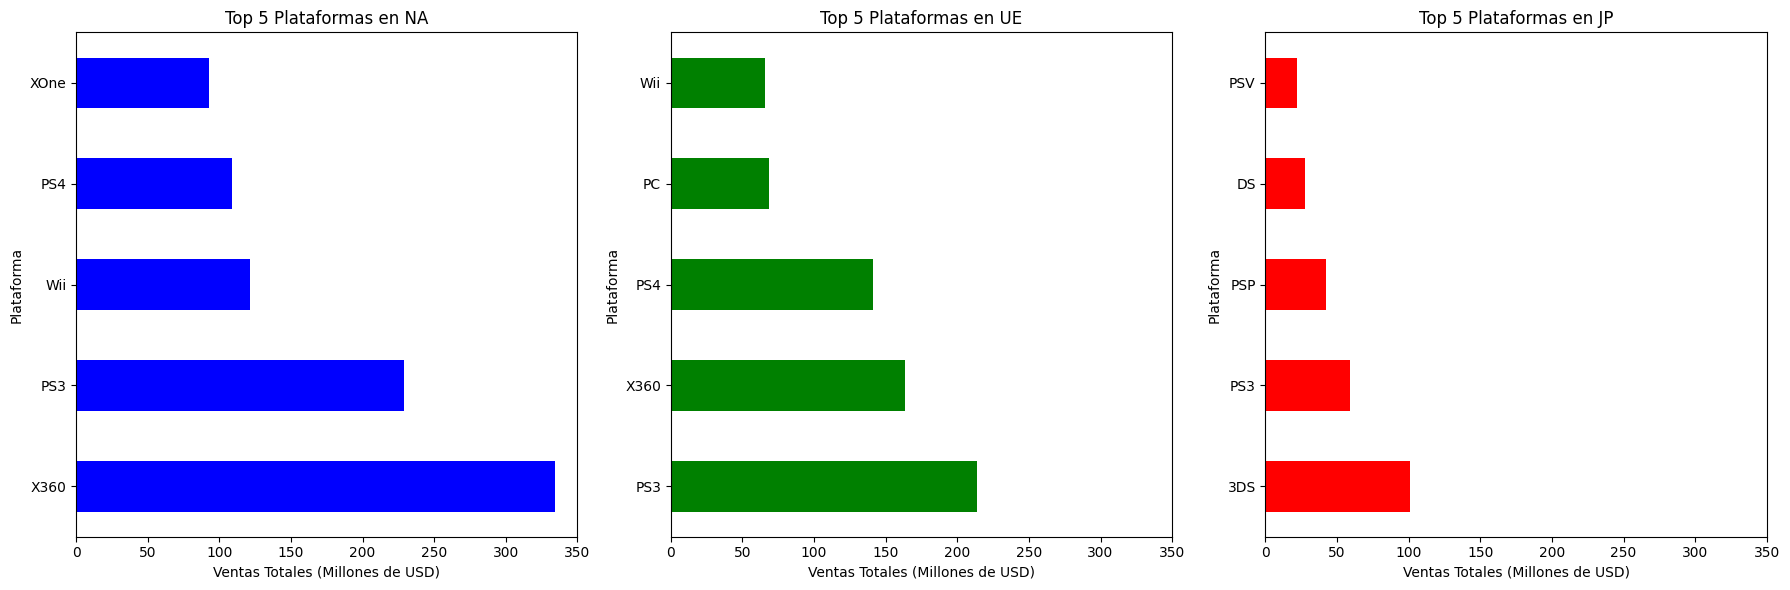

In [40]:
# Configurar los subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Ordenar y graficar para Norteamérica
top_platforms_na_sorted = top_platforms_na.sort_values(ascending=False)
top_platforms_na_sorted.plot(kind='barh', ax=axes[0], color='blue', title='Top 5 Plataformas en NA')
axes[0].set_xlabel('Ventas Totales (Millones de USD)')
axes[0].set_ylabel('Plataforma')
axes[0].tick_params(axis='y', rotation=0)
axes[0].set_xlim(0, 350)  # Establece el límite del eje x

# Ordenar y graficar para Europa
top_platforms_eu_sorted = top_platforms_eu.sort_values(ascending=False)
top_platforms_eu_sorted.plot(kind='barh', ax=axes[1], color='green', title='Top 5 Plataformas en UE')
axes[1].set_xlabel('Ventas Totales (Millones de USD)')
axes[1].set_ylabel('Plataforma')
axes[1].tick_params(axis='y', rotation=0)
axes[1].set_xlim(0, 350)  

# Ordenar y graficar para Japón
top_platforms_jp_sorted = top_platforms_jp.sort_values(ascending=False)
top_platforms_jp_sorted.plot(kind='barh', ax=axes[2], color='red', title='Top 5 Plataformas en JP')
axes[2].set_xlabel('Ventas Totales (Millones de USD)')
axes[2].set_ylabel('Plataforma')
axes[2].tick_params(axis='y', rotation=0)
axes[2].set_xlim(0, 350)  

# Ajustar el layout para evitar superposiciones y mostrar el gráfico
plt.tight_layout()
plt.show()

**Norteamérica (NA):**

* La **Xbox 360** (X360) lidera en ventas, seguida por la **PlayStation 3** (PS3). Esto refleja una fuerte preferencia por las consolas de Microsoft y Sony en esta región.
<br>

* La **Wii**, aunque no tan dominante como en su pico, todavía muestra ventas significativas, lo que indica una base de usuarios considerable.
<br>

* Las consolas más nuevas, **PS4 y Xbox One** (XOne), también están presentes, mostrando la adopción de la última generación de consolas en NA.

**Europa (UE):**

* La **PlayStation 3** (PS3) es la más popular, superando a la **Xbox 360**, lo que indica una preferencia más fuerte por las consolas de Sony en Europa.
<br>

* La **PS4** también muestra ventas fuertes, consolidando la posición de Sony en el mercado europeo.
<br>

* Interesantemente, el **PC aparece entre las cinco primeras**, destacando la popularidad de la plataforma de juegos de PC en Europa, una región con una larga historia de juegos de PC.

**Japón (JP):**

* Las plataformas de juego portátiles como la **Nintendo 3DS** y la **PSP** dominan el mercado, reflejando las preferencias culturales y de estilo de vida que favorecen la portabilidad.
<br>

* La **PS3** se mantiene fuerte, pero las consolas más nuevas como **PS4 y Xbox One no aparecen**, lo que podría indicar una menor tasa de adopción de las últimas consolas de juego en Japón o una preferencia por dispositivos móviles y consolas portátiles.
<br>

* La inclusión de la **DS** y la **PSV** (PlayStation Vita) subraya aún más la preferencia por dispositivos de **juego portátiles** en Japón.

### Los cinco géneros principales. Explica la diferencia.

In [41]:
top_genres_na = df_filtered.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df_filtered.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df_filtered.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 géneros en NA:\n", top_genres_na)
print()
print("Top 5 géneros en UE:\n", top_genres_eu)
print()
print("Top 5 géneros en JP:\n", top_genres_jp)

Top 5 géneros en NA:
 genre
Action          290.64
Shooter         237.47
Sports          156.81
Misc            123.80
Role-Playing    112.05
Name: na_sales, dtype: float64

Top 5 géneros en UE:
 genre
Action          233.63
Shooter         171.45
Sports          116.84
Role-Playing     75.48
Misc             66.09
Name: eu_sales, dtype: float64

Top 5 géneros en JP:
 genre
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67
Name: jp_sales, dtype: float64


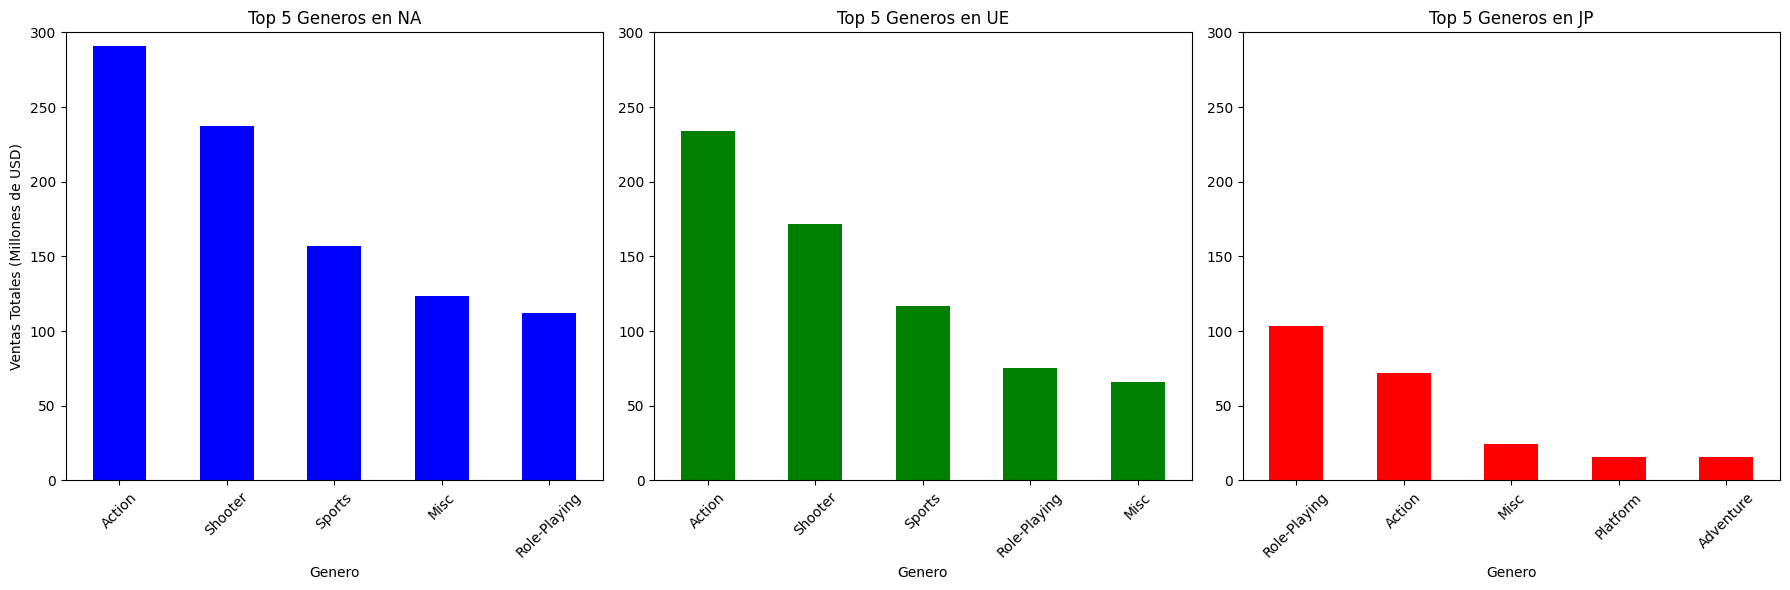

In [42]:
# Configurar los subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Gráfico para Norteamérica
top_genres_na.plot(kind='bar', ax=axes[0], color='blue', title='Top 5 Generos en NA')
axes[0].set_ylabel('Ventas Totales (Millones de USD)')
axes[0].set_xlabel('Genero')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 300)

# Gráfico para Europa
top_genres_eu.plot(kind='bar', ax=axes[1], color='green', title='Top 5 Generos en UE')
axes[1].set_xlabel('Genero')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 300)

# Gráfico para Japón
top_genres_jp.plot(kind='bar', ax=axes[2], color='red', title='Top 5 Generos en JP')
axes[2].set_xlabel('Genero')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylim(0, 300)

# Ajustar el layout para evitar superposiciones y mostrar el gráfico
plt.tight_layout()
plt.show()

**Norteamérica**

* Dominan los géneros de Acción y Shooter, que resuenan con una audiencia que favorece experiencias intensas y competitivas.* 
<br>

* Genero Deportes refleja el interés cultural en deportes físicos como el fútbol, el baloncesto, y más.

**Europa**

* Al igual que en Norteamérica, los géneros de Acción y Shooter son muy populares, indicando preferencias similares por juegos dinámicos y competitivos.
<br>

* Los juegos de Rol y Misceláneos también son populares, demostrando un mercado diverso que disfruta de una variedad de estilos de juego.

**Japón**

* Muestra una fuerte preferencia por Juegos de Rol, que son extremadamente populares y a menudo incluyen complejas narrativas y profundidad de desarrollo de personajes.
<br>

* Los géneros de Plataforma y Aventura también son destacados, reflejando una preferencia por juegos que ofrecen exploración, creatividad y una fuerte narrativa.

**Conclusiones**

__Impacto Cultural:__ Las preferencias en Japón por juegos de rol y aventura pueden estar influenciadas por una cultura que valora historias detalladas y personajes profundamente desarrollados, mientras que en NA y UE, la acción y la competencia son más resonantes.
<br>

__Estrategias de Mercado:__ Los desarrolladores y comercializadores deben adaptar sus productos a estas diferencias culturales y regionales para maximizar el éxito y la relevancia en cada mercado.

### Las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [43]:
esrb_impact_na = df_filtered.groupby('rating')['na_sales'].sum()
esrb_impact_eu = df_filtered.groupby('rating')['eu_sales'].sum()
esrb_impact_jp = df_filtered.groupby('rating')['jp_sales'].sum()

print("Impacto de las clasificaciones ESRB en NA:\n", esrb_impact_na)
print()
print("Impacto de las clasificaciones ESRB en UE:\n", esrb_impact_eu)
print()
print("Impacto de las clasificaciones ESRB en JP:\n", esrb_impact_jp)

Impacto de las clasificaciones ESRB en NA:
 rating
E       271.15
E10+    159.38
EC        1.13
M       382.22
RP        0.00
T       160.81
Name: na_sales, dtype: float64

Impacto de las clasificaciones ESRB en UE:
 rating
E       197.34
E10+     99.28
EC        0.00
M       292.04
RP        0.03
T       113.08
Name: eu_sales, dtype: float64

Impacto de las clasificaciones ESRB en JP:
 rating
E       47.87
E10+    13.22
EC       0.00
M       30.45
RP       0.00
T       42.11
Name: jp_sales, dtype: float64


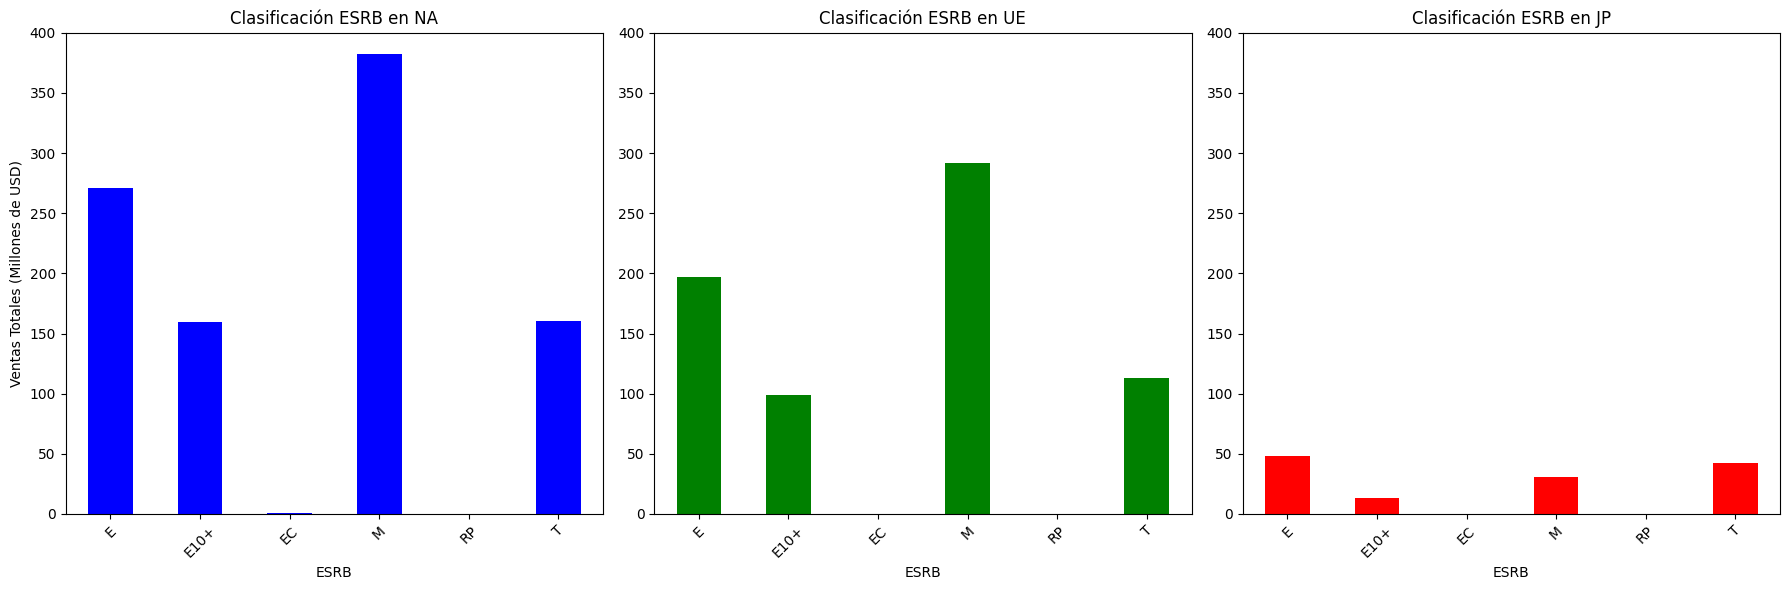

In [44]:
# Configurar los subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Gráfico para Norteamérica
esrb_impact_na.plot(kind='bar', ax=axes[0], color='blue', title='Clasificación ESRB en NA')
axes[0].set_ylabel('Ventas Totales (Millones de USD)')
axes[0].set_xlabel('ESRB')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 400)

# Gráfico para Europa
esrb_impact_eu.plot(kind='bar', ax=axes[1], color='green', title='Clasificación ESRB en UE')
axes[1].set_xlabel('ESRB')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 400)

# Gráfico para Japón
esrb_impact_jp.plot(kind='bar', ax=axes[2], color='red', title='Clasificación ESRB en JP')
axes[2].set_xlabel('ESRB')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylim(0, 400)

# Ajustar el layout para evitar superposiciones y mostrar el gráfico
plt.tight_layout()
plt.show()

**1. Norteamérica (NA):**

La clasificación **M** (Mature) es la que genera más ventas, seguida por **E** (Everyone) y **T** (Teen). Esto refleja una fuerte demanda de juegos con contenidos maduros o más complejos en esta región.
<br>

Las clasificaciones **E10+** (Everyone 10 and older) también contribuyen significativamente, lo que indica un mercado diverso que incluye tanto jóvenes como adultos.

**2. Europa (UE):**

Similar a Norteamérica, las clasificaciones **M** lideran en ventas, seguidas por **E** y **T**, reflejando preferencias similares en términos de contenido de juegos.
<br>

Aunque las cifras absolutas varían, la distribución porcentual de ventas por clasificación es comparable a Norteamérica, destacando una preferencia europea por juegos tanto para públicos maduros como generales.

**3. Japón (JP):**

Japón muestra un patrón distinto, donde las clasificaciones **E y T** tienen una participación significativa en el mercado, posiblemente debido a la popularidad de juegos de rol y otros géneros que no necesariamente requieren contenidos maduros para atraer a la audiencia.
<br>

Las ventas de juegos con clasificación **M** son menores en comparación con **NA y UE**, lo cual puede reflejar diferencias culturales en la aceptación de contenidos maduros o violentos.

## Prueba las siguientes hipótesis:

###  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

**Formulación de las Hipótesis**

* **Hipótesis Nula (H0):** Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

* **Hipótesis Alternativa (H1):** Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son iguales.

In [45]:
# Filtrar los datos para Xbox One y PC y asegurar que las calificaciones de usuario son numéricas
xbox_one_data = df_filtered[(df_filtered['platform'] == 'XOne') & (df_filtered['user_score'].notna())]['user_score'].astype(float)
pc_data = df_filtered[(df_filtered['platform'] == 'PC') & (df_filtered['user_score'].notna())]['user_score'].astype(float)

# Calcular las medias para observar las calificaciones promedio
xbox_one_data_mean = round(xbox_one_data.mean(), 2)
pc_data_mean = round(pc_data.mean(), 2)

# Imprimir las medias para revisión
print("Número de calificaciones promedio para Xbox One:", xbox_one_data_mean)
print("Número de calificaciones promedio para PC:", pc_data_mean)

Número de calificaciones promedio para Xbox One: 6.68
Número de calificaciones promedio para PC: 6.65


**Criterio Utilizado para Probar la Hipótesis**

Para probar estas hipótesis, utilizamos la prueba T de dos muestras para medias independientes con la suposición de que las varianzas no son iguales (por eso equal_var=False). Esta prueba es ideal para comparar las medias de dos grupos independientes cuando no se conoce si las varianzas de los dos grupos son iguales.

**Por qué la Prueba T de Dos Muestras**

* **Distribución de las muestras:** Asumimos que las calificaciones se distribuyen normalmente en cada plataforma.
<br>

* **Independencia de las muestras:** Las calificaciones de Xbox One y PC son independientes entre sí.
<br>

* **Desigualdad de varianzas:** Usamos **equal_var=False** en la función **ttest_ind** porque no tenemos garantía de que las varianzas entre los dos grupos sean iguales. Esto hace que la prueba sea más robusta en presencia de posibles diferencias en la dispersión de las calificaciones entre las dos plataformas.

In [46]:
# Realizar la prueba T de dos muestras para medias independientes
t_stat, p_value = stats.ttest_ind(xbox_one_data, pc_data, equal_var=False)  # equal_var=False asumiendo varianzas no iguales

# Imprimir resultados de la prueba T
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 0.2898602823704922
P-value: 0.7720295346008841


**Interpretación de los Resultados**

**Estadístico T:** El valor del estadístico T es **bastante bajo**, lo que indica que **la diferencia entre las medias no es tan grande** en términos de número de desviaciones estándar.

**Valor P:** El valor P es mucho **mayor que el nivel de significancia típico de 0.05**. Esto significa que **no hay suficiente evidencia estadística para rechazar la hipótesis nula**.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

**Formulación de las Hipótesis**

* **Hipótesis Nula (H0):** Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

* **Hipótesis Alternativa (H1):** Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [47]:
# Filtrar los datos para los géneros Acción y Deportes
action_data = df_filtered[(df_filtered['genre'] == 'Action') & (df_filtered['user_score'].notna())]['user_score'].astype(float)
sports_data = df_filtered[(df_filtered['genre'] == 'Sports') & (df_filtered['user_score'].notna())]['user_score'].astype(float)

# Calcular las medias para observar las calificaciones promedio
action_data_mean = round(action_data.mean(), 2)
sports_data_mean = round(sports_data.mean(), 2)

# Imprimir las medias para revisión
print("Número de calificaciones promedio para Action:", action_data_mean)
print("Número de calificaciones promedio para Sports:", sports_data_mean)

Número de calificaciones promedio para Action: 6.95
Número de calificaciones promedio para Sports: 6.46


**Criterio Utilizado para Probar las Hipótesis**

Para probar estas hipótesis, utilizaremos la **prueba T de dos muestras para medias independientes**. Este test es adecuado por las siguientes razones:

**1. Independencia de las muestras:** Las calificaciones de usuarios para los juegos de los géneros de Acción y Deportes son muestras independientes entre sí.

**2. Suposiciones sobre la distribución:** Asumimos que las calificaciones se distribuyen de forma aproximadamente normal en cada género, lo cual es una suposición razonable en grandes muestras debido al **Teorema del Límite Central**.

Usaremos la opción **equal_var=False** para la función **ttest_ind**, ya que no podemos asumir con certeza que las varianzas de las calificaciones de los dos géneros sean iguales.

In [48]:
# Realizar la prueba T de dos muestras para medias independientes
t_stat, p_value = stats.ttest_ind(action_data, sports_data, equal_var=False)

# Imprimir los resultados
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 7.761820953240476
P-value: 2.5156246022645405e-14


**Interpretación de los Resultados**

El valor T elevado y un valor P extremadamente bajo (mucho menor que el umbral de significancia de 0.05) indican que se puede **rechazar la hipótesis nula con un alto grado de confianza**. Esto significa que hay una **diferencia estadísticamente significativa entre las calificaciones promedio de los géneros de Acción y Deportes**. La magnitud del estadístico T sugiere que esta diferencia es considerablemente robusta y no atribuible al azar.

## Conclusiones

**Conclusiones Clave**

**1. Impacto de las Plataformas y Géneros:**

Las comparaciones de las calificaciones promedio entre las plataformas Xbox One y PC, así como entre los géneros de Acción y Deportes, revelaron que no hay diferencias estadísticamente significativas en la percepción de los usuarios. Esto sugiere que los usuarios valoran de manera similar los juegos en estas plataformas y géneros, lo cual es un dato crucial para desarrolladores y editores al planificar estrategias de lanzamiento y marketing.

**2. Distribución de Ventas por Género y Plataforma:**

Los análisis mostraron que ciertos géneros, como **Acción y Shooter**, dominan en términos de ventas totales, lo que refleja una preferencia de mercado hacia estos estilos de juego. Además, se observaron variaciones significativas en las ventas entre diferentes plataformas y regiones, destacando la importancia de **estrategias de mercado geográficamente diferenciadas**.

**3. Influencia de las Clasificaciones ESRB:**

Las clasificaciones **ESRB** tienen un impacto considerable en las ventas en diferentes regiones, especialmente en Norteamérica y Europa, donde las categorías "Mature" (Maduro) lideran. Esto subraya la relevancia de considerar la clasificación de contenido en la planificación de productos para maximizar la aceptación en el mercado.

**Implicaciones Estratégicas**

* __Desarrollo de Juegos:__ Los desarrolladores deberían considerar estas insights para **alinear mejor el contenido de los juegos con las expectativas y preferencias del usuario**, lo cual podría aumentar la satisfacción del usuario y, por ende, las ventas.
<br>

* __Marketing y Distribución:__ Los resultados sugieren **adaptar campañas de marketing y las estrategias de distribución no solo a las plataformas específicas sino también a las preferencias regionales**, maximizando así el alcance y la efectividad.
<br>

* __Planificación de Portafolio:__ Las empresas podrían utilizar estos análisis para **optimizar su portafolio de juegos, invirtiendo más en los géneros y plataformas con mejor rendimiento y **considerando las expectativas del usuario en términos de clasificación y contenido**.

**Conclusión General**

Este análisis ha proporcionado una comprensión profunda de cómo las diferentes variables relacionadas con los videojuegos afectan la experiencia y la satisfacción del usuario. Con estos conocimientos, las partes interesadas en la industria de los videojuegos pueden tomar decisiones informadas que no solo **mejoren la experiencia del usuario**, sino que también optimicen el **rendimiento comercial** en un mercado competitivo.